**Measure Properties of Nuclei**

Aim : Determine the relationship between protein expression level [GFP], and puncta (number, size, intensity and distribution)

In [1]:
import pandas as pd
import numpy as np
import skimage.io as io
io.use_plugin('tifffile')

#Load image
im = io.imread('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1.tif')

#Slice1 contains ~58 nuclei, 52 not touching the border

#Select Hoechst stack
Hoechst_stack = im[:,:,:,0]

#Select GFP stack
GFP_stack = im[:,:,:,1]

z=4

In [2]:
#Import labelled nuceli stack
labeled_hulls=io.imread('C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Well02_HeLa_PHD2-IDR-PHD3_1/Well02_HeLa_PHD2-IDR-PHD3_1_Labeled_Nuclei.tif')

In [75]:
#Remove hulls at image boarders
import mahotas as mh

complete_hulls=np.zeros_like(labeled_hulls)

for z, frame in enumerate(labeled_hulls):
    complete_hulls[z]=mh.labeled.remove_bordering(frame[z])
    
complete_hulls, hulls_left=mh.labeled.relabel(complete_hulls)
print('After filtering and relabeling, there are {} hulls left.'.format(hulls_left))

After filtering and relabeling, there are 38 hulls left.


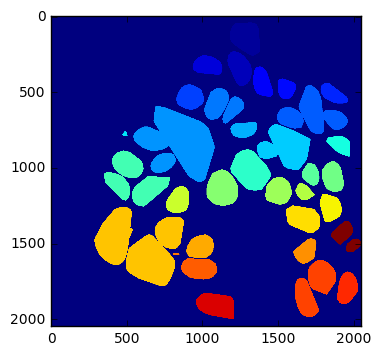

In [163]:
plt.imshow(complete_hulls[z])

In [88]:
##Measure properties
from skimage.measure import regionprops

props=[]
indx=[]

hull_props=regionprops(label_image=complete_hulls, intensity_image=GFP_stack)

heading=["Center_x", "Center_y", "Center_z", "volume", "mean_GFP", "integrated_GFP"]

for h in hull_props:
    
    #Get bounding box
    bb=np.array(h.bbox)
    #zmin, ymin, xmin, zmax, ymax, xmax  = h.bbox
    
    #Calculate Center
    zcent=int(round((bb[0]+bb[3])/2))
    ycent=int(round((bb[1]+bb[4])/2))
    xcent=int(round((bb[2]+bb[5])/2))
    
    props.append([xcent,
                  ycent,
                  zcent,
                  h.area,
                  h.mean_intensity,
                  h.mean_intensity * h.area])
    indx.append(h.label)
Hull_Properties=pd.DataFrame(props, index=indx, columns=heading)

In [162]:
Hull_Properties

,Center_x,Center_y,Center_z,volume,mean_GFP,integrated_GFP,Transfected,std_GFP
1,1281,163,12,735730,105.630245,77715340.0,False,59.587083
2,1238,355,12,580976,134.993440,78427949.0,True,3.862554
3,1034,342,12,426777,235.089508,100330795.0,True,12.627055
4,1402,444,12,431162,120.500469,51955223.0,True,41.378741
5,1568,489,12,309081,105.144454,32498153.0,False,8.981431
6,1863,517,12,359213,104.693477,37607258.0,False,3.618070
7,928,538,12,529449,106.877909,56586402.0,False,3.488487
8,1721,622,12,1622658,105.019466,170410677.0,False,4.259448
9,1145,636,12,926491,159.572383,147842377.0,True,3.631905
10,809,848,12,3796217,114.363898,434150175.0,False,50.624545


In [90]:
##Add a new column to pd.df
Background_GFP=118  #Need an unbiased way to calculate Background GFP signal

Hull_Properties["Transfected"] = Hull_Properties["mean_GFP"]>Background_GFP 

In [92]:
#Generate crop coordinates from the pandas data frame for a given index
def crop_crds(hull_index):

    #Use 'icol' to query pd.df 'Hull_Properties' with an integer
    Hull=Hull_Properties.iloc[hull_index]

    #Calculate cropped image coordinates
    z = Hull[2]
    y_min = Hull[1]-128
    y_max = Hull[1]+128
    x_min = Hull[0]-128
    x_max = Hull[0]+128
    
    return (z, y_min, y_max, x_min, x_max)

In [93]:
##Or use regionprops h.intensity_image, but this will give a variable window size

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

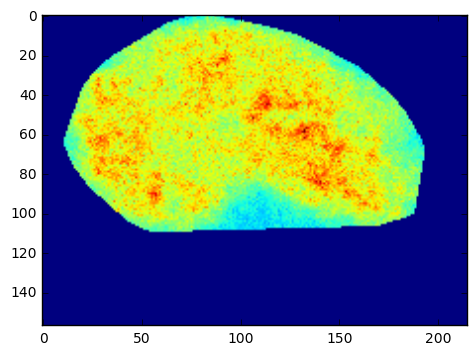

In [130]:
#for h in hull_props:
    
    #Get bounding box
    #bb=np.array(h.intensity_image)

temp=np.array(hull_props[2].intensity_image)
    
plt.imshow(temp[z])

In [144]:
z, y_min, y_max, x_min, x_max = crop_crds(7)

(<matplotlib.axes._subplots.AxesSubplot at 0x6a17bef0>,
 <matplotlib.text.Text at 0x6a5fb080>)

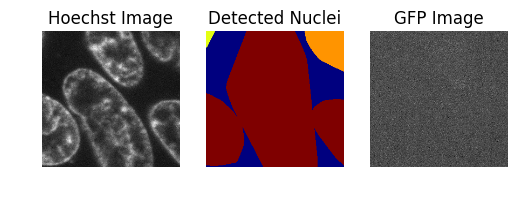

In [145]:
#Plot Hoechst image
plt.subplot(1,3,1),plt.imshow(Hoechst_stack[z, y_min:y_max, x_min:x_max], cmap='gray')
plt.subplot(1,3,1),plt.axis('off')
plt.subplot(1,3,1),plt.title('Hoechst Image')

##Plot hull
plt.subplot(1,3,2),plt.imshow(complete_hulls[z, y_min:y_max, x_min:x_max])
plt.subplot(1,3,2),plt.axis('off')
plt.subplot(1,3,2),plt.title('Detected Nuclei')

#Plot GFP image
plt.subplot(1,3,3),plt.imshow(GFP_stack[z, y_min:y_max, x_min:x_max], cmap='gray')
plt.subplot(1,3,3),plt.axis('off')
plt.subplot(1,3,3),plt.title('GFP Image')

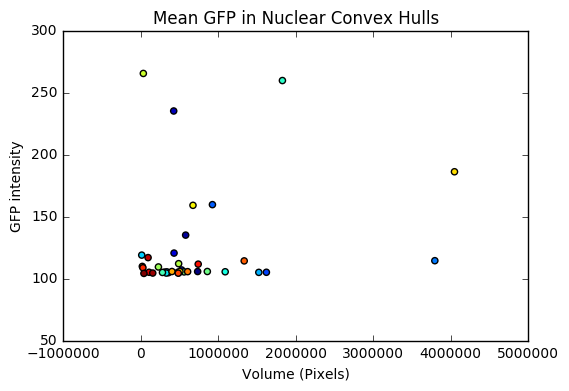

In [101]:
#Plot integrated_GFP
plt.scatter(Hull_Properties['volume'], Hull_Properties['mean_GFP'], c=Hull_Properties.index)
plt.xlabel("Volume (Pixels)")
plt.ylabel("GFP intensity")
plt.title("Mean GFP in Nuclear Convex Hulls")

<Container object of 38 artists>

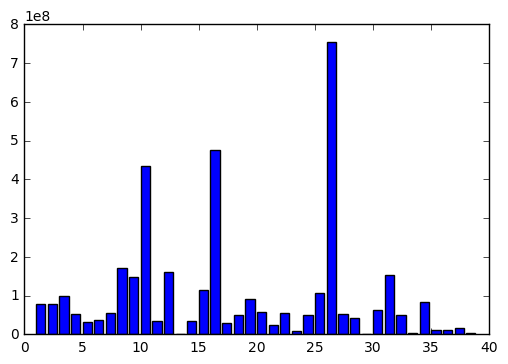

In [102]:
##Plot integrated_GFP
plt.bar(Hull_Properties.index, Hull_Properties['integrated_GFP'])

<Container object of 38 artists>

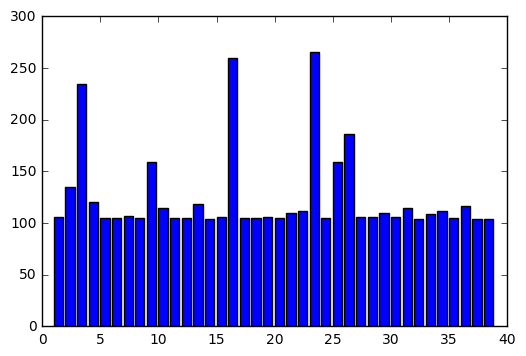

In [103]:
##Plot mean_GFP
plt.bar(Hull_Properties.index, Hull_Properties['mean_GFP'])

In [ ]:
import numpy.ma as MA

In [77]:
##Determine standard deviation for each cell (SLOW)
GFP_std=[]
for h in range(complete_hulls.max()):
    GFP_ma=MA.masked_array(GFP_stack,
                           mask=np.logical_not(complete_hulls==h))
    GFP_ma_std=np.std(GFP_ma)
    GFP_std.append(GFP_ma_std) #note, append is a function to be called, not a value to be set, eg. GFP_std.append = GFP_ma_std

In [ ]:
GFP_std

In [104]:
##Determine standard deviation for each labeled region (SLOW)

#Load a labelled image and an intensity image
def label_std(labeled_image, intensity_image):

    label_std=[]
    for h in range(labeled_image.max()):
        label_ma=MA.masked_array(intensity_image,
                               mask=np.logical_not(labeled_image==h))
        label_std.append(np.std(label_ma))
    return label_std    

In [105]:
Hull_Properties["std_GFP"]=label_std(complete_hulls, GFP_stack)

In [158]:
filtered=Hull_Properties[Hull_Properties["volume"]<1800000]

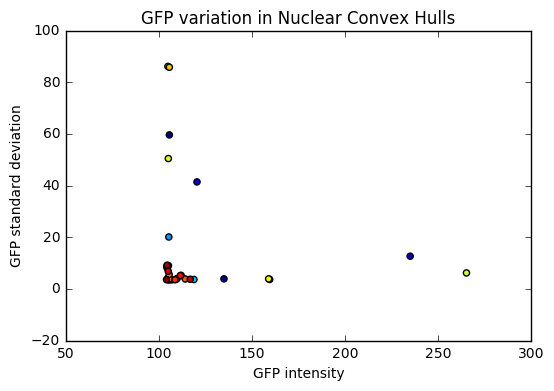

In [159]:
#Plot std against mean
plt.scatter(filtered['mean_GFP'], filtered['std_GFP'], c=filtered.index)
plt.xlabel("GFP intensity")
plt.ylabel("GFP standard deviation")
plt.title("GFP variation in Nuclear Convex Hulls")

In [108]:
pos_cells=Hull_Properties[(Hull_Properties["Transfected"] == True) & (Hull_Properties["volume"]<1800000)].index
im_rows=len(pos_cells)
im_rows

7

In [149]:
Hull_Properties.shape[0]

38

In [150]:
#Collect cropped images for each cell
Hoechst_ims=np.zeros((Hull_Properties.shape[0],256,256))
hull_ims=np.zeros((Hull_Properties.shape[0],256,256))
GFP_ims=np.zeros((Hull_Properties.shape[0],256,256))

for c in range(Hull_Properties.shape[0]):
    print(c)  
    #Extract crop coordinates
    z, y_min, y_max, x_min, x_max = crop_crds(c)
    
    #Store images
    Hoechst_ims[c]=Hoechst_stack[z, y_min:y_max, x_min:x_max]
    hull_ims[c]=complete_hulls[z, y_min:y_max, x_min:x_max]
    GFP_ims[c]=GFP_stack[z, y_min:y_max, x_min:x_max]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


ValueError: could not broadcast input array from shape (256,225) into shape (256,256)

In [151]:
#z, y_min, y_max, x_min, x_max = crop_crds(7)
crop_crds(31)[3:4]    

(12, 1675, 1931, 1823, 2079)

In [156]:
crop_crds(31)[3:5] 

(1823, 2079)

In [110]:
# #Collect cropped images of cells identified as transfected 'pos_cells'
# Hoechst_ims=np.zeros((im_rows,256,256))
# hull_ims=np.zeros((im_rows,256,256))
# GFP_ims=np.zeros((im_rows,256,256))

# for c in range(im_rows):
#     #print(c)
#     cell=pos_cells[c]
#     #print(cell)
    
#     #Extract crop coordinates
#     z, y_min, y_max, x_min, x_max = crop_crds(cell)
    
#     #Store images
#     Hoechst_ims[c]=Hoechst_stack[z, y_min:y_max, x_min:x_max]
#     hull_ims[c]=complete_hulls[z, y_min:y_max, x_min:x_max]
#     GFP_ims[c]=GFP_stack[z, y_min:y_max, x_min:x_max]

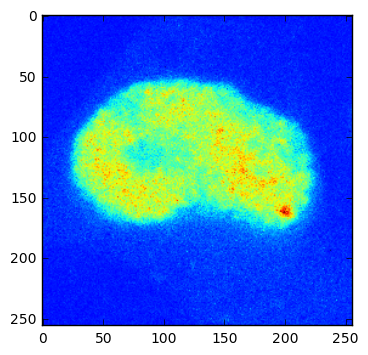

In [115]:
plt.imshow(GFP_ims[0])

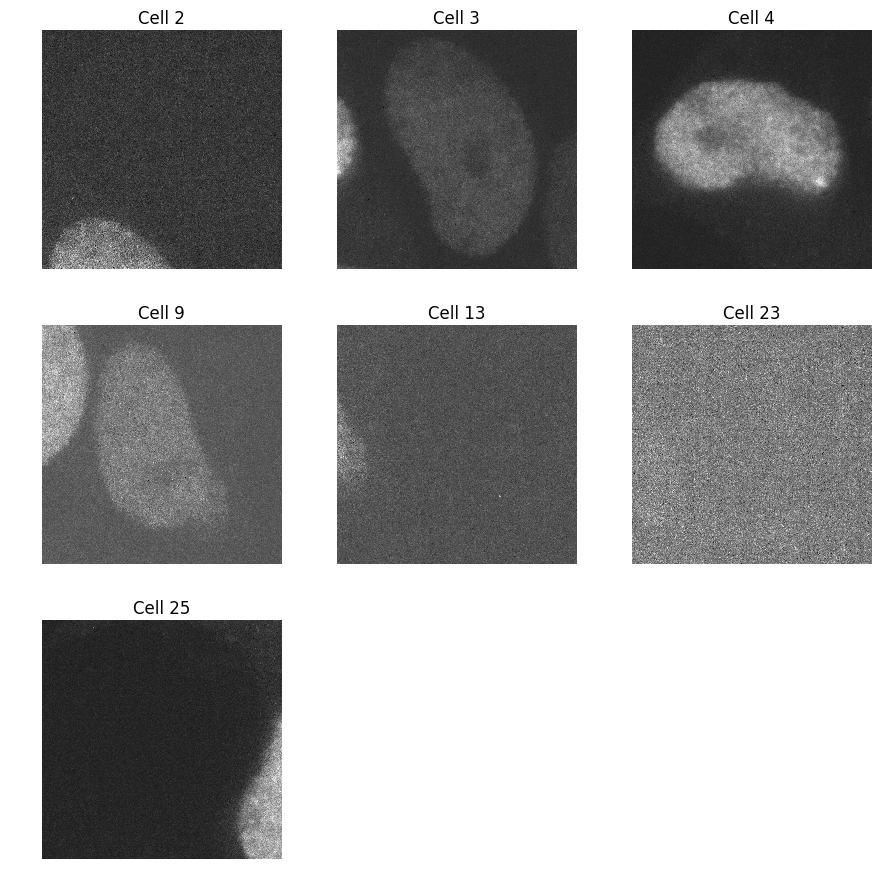

In [160]:
##Plot GFP images
nrows = np.int(np.ceil(np.sqrt(im_rows)))
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))

for n in range(im_rows):
    i = n // ncols
    j = n % ncols
    
    #Identify the cell
    cell=pos_cells[n]
    title = "Cell "+str(cell)
    axes[i, j].imshow(GFP_ims[n, ...],
                      interpolation='nearest', cmap='gray')
    
    axes[i, j].set_title(title)
    axes[i, j].axis("off")
    
## Remove empty plots 
for ax in axes.ravel():
    if not(len(ax.images)):
        fig.delaxes(ax)
fig.tight_layout()

In [ ]:
##Does cell contain puncta?
h=0

#z=16

cell_mean = GFP_stack[complete_hulls==[h]].mean()

hull = complete_hulls==[h]

plt.imshow(GFP_ims>cell_mean, cmap='gray')

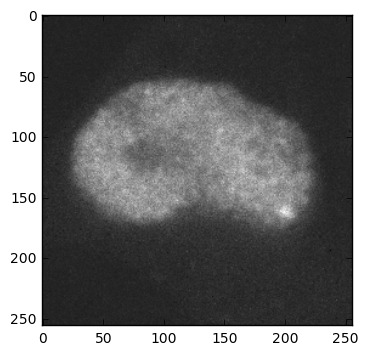

In [121]:
plt.imshow(GFP_ims[0], cmap='gray')

In [ ]:
Hull_Properties["mean_GFP"]

In [124]:
plt.imshow(GFP_ims[0]>Hull_Properties[0]["mean_GFP"], cmap='gray')

KeyError: 0

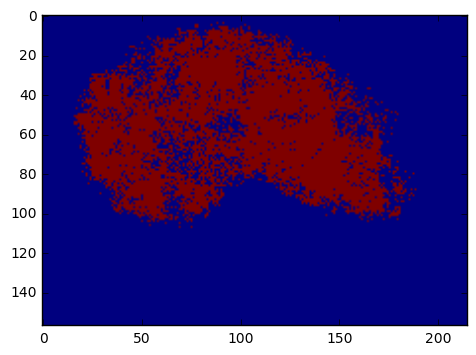

In [133]:
##Fix cropped image selection

im_g=np.array(hull_props[2].intensity_image)
mean_g=np.array(hull_props[2].mean_intensity)
    
#plt.imshow(im_g[z])
    
plt.imshow(im_g[z]>mean_g)